In [19]:
!pip install torchinfo tqdm torch

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 56.7 MB/s  0:00:13m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 71.0 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 62.0 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 25.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 60.1 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 68.5 MB

In [1]:
import pandas as pd
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load packages
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
# N, D = X_train.shape
from datetime import date

In [2]:
df = pd.read_csv('data/etf/jan2025/cleaned/slv_cleaned_jan2025.csv', sep = ',')
df["Date-Time"] = pd.to_datetime(df["Date-Time"])


In [4]:
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")

In [5]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,SLV,2025-01-03 09:40:00.028091268-05:00,0.000735,0.02,27.210,27.20,9100.0,27.22,4100.0,27.19,...,27.11,200.0,27.31,800.0,0.000,0.010,0.010,0,0,0
1,SLV,2025-01-03 09:40:00.375169630-05:00,0.000367,0.01,27.215,27.21,2700.0,27.22,11200.0,27.20,...,27.12,5200.0,27.31,800.0,0.000,0.010,0.000,0,2,0
2,SLV,2025-01-03 09:40:05.023122125-05:00,0.000735,0.02,27.220,27.21,20300.0,27.23,25500.0,27.20,...,27.12,5200.0,27.32,200.0,0.000,-0.005,0.005,0,0,0
3,SLV,2025-01-03 09:40:05.447334991-05:00,0.000367,0.01,27.215,27.21,18000.0,27.22,2600.0,27.20,...,27.12,5200.0,27.31,800.0,0.000,0.010,0.005,0,2,0
4,SLV,2025-01-03 09:40:07.162635990-05:00,0.000735,0.02,27.220,27.21,23900.0,27.23,25500.0,27.20,...,27.12,5200.0,27.32,200.0,-0.010,-0.005,-0.005,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,SLV,2025-01-31 15:35:23.587710078-05:00,0.000352,0.01,28.425,28.42,3605.0,28.43,9300.0,28.41,...,28.33,2400.0,28.52,400.0,0.025,0.015,0.040,2,2,2
106170,SLV,2025-01-31 15:36:03.037490790-05:00,0.000703,0.02,28.430,28.42,11800.0,28.44,9400.0,28.41,...,28.33,600.0,28.53,100.0,0.015,0.005,0.040,2,0,2
106171,SLV,2025-01-31 15:36:03.707504164-05:00,0.000352,0.01,28.425,28.42,11800.0,28.43,1800.0,28.41,...,28.33,600.0,28.52,1200.0,0.025,0.015,0.040,2,2,2
106172,SLV,2025-01-31 15:36:04.472256257-05:00,0.000352,0.01,28.435,28.43,2900.0,28.44,3900.0,28.42,...,28.34,1200.0,28.53,100.0,0.020,0.010,0.035,2,0,2


In [6]:
# ---- select columns to normalize: all L1–L10 Bid/Ask Price and Size ----
price_cols = [f"L{i}-BidPrice" for i in range(1, 11)] + [f"L{i}-AskPrice" for i in range(1, 11)]
size_cols  = [f"L{i}-BidSize"  for i in range(1, 11)] + [f"L{i}-AskSize"  for i in range(1, 11)]
cols_to_normalize = price_cols + size_cols

# ---- apply z-score normalization ----
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])



In [7]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,SLV,2025-01-03 09:40:00.028091268-05:00,0.000735,0.02,27.210,-1.170929,0.779713,-1.162009,-0.301225,-1.170573,...,-1.157453,-0.584018,-1.148298,-0.048030,0.000,0.010,0.010,0,0,0
1,SLV,2025-01-03 09:40:00.375169630-05:00,0.000367,0.01,27.215,-1.150236,-0.592043,-1.162009,1.177274,-1.149882,...,-1.136899,3.669561,-1.148298,-0.048030,0.000,0.010,0.000,0,2,0
2,SLV,2025-01-03 09:40:05.023122125-05:00,0.000735,0.02,27.220,-1.150236,3.180284,-1.141317,4.155095,-1.149882,...,-1.136899,3.669561,-1.128105,-0.577182,0.000,-0.005,0.005,0,0,0
3,SLV,2025-01-03 09:40:05.447334991-05:00,0.000367,0.01,27.215,-1.150236,2.687310,-1.162009,-0.613584,-1.149882,...,-1.136899,3.669561,-1.148298,-0.048030,0.000,0.010,0.005,0,2,0
4,SLV,2025-01-03 09:40:07.162635990-05:00,0.000735,0.02,27.220,-1.150236,3.951897,-1.141317,4.155095,-1.149882,...,-1.136899,3.669561,-1.128105,-0.577182,-0.010,-0.005,-0.005,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,SLV,2025-01-31 15:35:23.587710078-05:00,0.000352,0.01,28.425,1.353589,-0.398068,1.341740,0.781619,1.353673,...,1.350134,1.287556,1.294976,-0.400798,0.025,0.015,0.040,2,2,2
106170,SLV,2025-01-31 15:36:03.037490790-05:00,0.000703,0.02,28.430,1.353589,1.358422,1.362432,0.802443,1.353673,...,1.350134,-0.243732,1.315169,-0.665374,0.015,0.005,0.040,2,0,2
106171,SLV,2025-01-31 15:36:03.707504164-05:00,0.000352,0.01,28.425,1.353589,1.358422,1.341740,-0.780175,1.353673,...,1.350134,-0.243732,1.294976,0.304737,0.025,0.015,0.040,2,2,2
106172,SLV,2025-01-31 15:36:04.472256257-05:00,0.000352,0.01,28.435,1.374281,-0.549175,1.362432,-0.342873,1.374363,...,1.370688,0.266697,1.315169,-0.665374,0.020,0.010,0.035,2,0,2


In [8]:
target_cols = [f"Target_{i}"  for i in [10,50,100]]
target_cols

['Target_10', 'Target_50', 'Target_100']

In [9]:
df[price_cols + size_cols+target_cols]

,L1-BidPrice,L2-BidPrice,L3-BidPrice,L4-BidPrice,L5-BidPrice,L6-BidPrice,L7-BidPrice,L8-BidPrice,L9-BidPrice,L10-BidPrice,...,L4-AskSize,L5-AskSize,L6-AskSize,L7-AskSize,L8-AskSize,L9-AskSize,L10-AskSize,Target_10,Target_50,Target_100
0,-1.170929,-1.170573,-1.170162,-1.169475,-1.168460,-1.167071,-1.165924,-1.164351,-1.162287,-1.157453,...,-0.006842,-0.522371,-0.561154,-0.613647,0.386100,-0.268494,-0.048030,0,0,0
1,-1.150236,-1.149882,-1.149475,-1.148792,-1.147787,-1.146413,-1.145277,-1.143720,-1.141677,-1.136899,...,4.342381,3.858108,-0.561154,-0.613647,0.386100,-0.268494,-0.048030,0,2,0
2,-1.150236,-1.149882,-1.149475,-1.148792,-1.147787,-1.146413,-1.145277,-1.143720,-1.141677,-1.136899,...,3.548942,3.443739,-0.924329,-0.083797,-0.403254,-0.268494,-0.577182,0,0,0
3,-1.150236,-1.149882,-1.149475,-1.148792,-1.147787,-1.146413,-1.145277,-1.143720,-1.141677,-1.136899,...,4.342381,3.858108,3.917997,-0.613647,0.386100,-0.268494,-0.048030,0,2,0
4,-1.150236,-1.149882,-1.149475,-1.148792,-1.147787,-1.146413,-1.145277,-1.143720,-1.141677,-1.136899,...,3.548942,3.443739,-0.924329,-0.083797,-0.403254,-0.268494,-0.577182,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,1.353589,1.353673,1.353685,1.353779,1.353610,1.353265,1.353089,1.352680,1.352190,1.350134,...,0.815984,0.543151,-0.803271,-0.500108,-0.121342,0.028994,-0.400798,2,2,2
106170,1.353589,1.353673,1.353685,1.353779,1.353610,1.353265,1.353089,1.352680,1.352190,1.350134,...,0.257637,-0.522371,-0.833535,-0.424415,-0.177725,0.028994,-0.665374,2,0,2
106171,1.353589,1.353673,1.353685,1.353779,1.353610,1.353265,1.353089,1.352680,1.352190,1.350134,...,0.845370,0.543151,-0.137451,-0.500108,-0.121342,0.028994,0.304737,2,2,2
106172,1.374281,1.374363,1.374373,1.374461,1.374283,1.373924,1.373737,1.373312,1.372801,1.370688,...,0.257637,-0.522371,-0.833535,-0.424415,-0.177725,0.028994,-0.665374,2,0,2


In [10]:
def prepare_x(data):
    df1 = data[:, :40]
    return np.array(df1)

def get_label(data):
    lob = data[:, -3:]
    return lob

def data_classification(X, Y, T):
    [N, D] = X.shape
    df = np.array(X)

    dY = np.array(Y)

    dataY = dY[T - 1:N]

    dataX = np.zeros((N - T + 1, T, D))
    for i in range(T, N + 1):
        dataX[i - T] = df[i - T:i, :]

    return dataX, dataY

def torch_data(x, y):
    x = torch.from_numpy(x)
    x = torch.unsqueeze(x, 1)
    y = torch.from_numpy(y)
    y = F.one_hot(y, num_classes=3)
    return x, y

In [11]:
class Dataset(data.Dataset):
    """Characterizes a dataset for PyTorch"""
    def __init__(self, data, k, num_classes, T):
        """Initialization"""
        self.k = k
        self.num_classes = num_classes
        self.T = T

        x = prepare_x(data)
        y = get_label(data)
        x, y = data_classification(x, y, self.T)
        y = y[:,self.k]
        self.length = len(x)

        x = torch.from_numpy(x)
        self.x = torch.unsqueeze(x, 1)
        self.y = torch.from_numpy(y)

    def __len__(self):
        """Denotes the total number of samples"""
        return self.length

    def __getitem__(self, index):
        """Generates samples of data"""
        return self.x[index], self.y[index]

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [13]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
df.groupby(["Date"]).size()

Date
2025-01-03     3091
2025-01-06     5516
2025-01-07     6412
2025-01-08     7171
2025-01-10     9715
2025-01-13     5359
2025-01-14     5024
2025-01-15     6418
2025-01-16     4973
2025-01-17     3398
2025-01-21     3581
2025-01-22     2582
2025-01-23     3242
2025-01-24     4269
2025-01-27     4396
2025-01-28     4010
2025-01-29    10478
2025-01-30     6163
2025-01-31    10376
dtype: int64

In [14]:

df_train = df[(df["Date"] >= date(2025, 1, 3)) & (df["Date"] <= date(2025, 1, 17))]
df_val = df[(df["Date"] >= date(2025, 1, 21)) & (df["Date"] <= date(2025, 1, 27))]
df_test = df[(df["Date"] >= date(2025, 1, 28)) & (df["Date"] <= date(2025, 1, 31))]

In [15]:
df_train = df_train[price_cols + size_cols+target_cols]
df_test =  df_test[price_cols + size_cols+target_cols]
df_val = df_val[price_cols + size_cols+target_cols]

In [16]:
batch_size = 64

dataset_train = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_val = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_test = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False)

print(dataset_train.x.shape, dataset_train.y.shape)

torch.Size([56978, 1, 100, 40]) torch.Size([56978])


In [17]:
class deeplob(nn.Module):
    def __init__(self, y_len):
        super().__init__()
        self.y_len = y_len

        # convolution blocks
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.LeakyReLU(negative_slope=0.01),
#             nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,10)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )

        # inception moduels
        self.inp1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(5,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp3 = nn.Sequential(
            nn.MaxPool2d((3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )

        # lstm layers
        self.lstm = nn.LSTM(input_size=192, hidden_size=64, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(64, self.y_len)

    def forward(self, x):
        # h0: (number of hidden layers, batch size, hidden size)
        h0 = torch.zeros(1, x.size(0), 64).to(device)
        c0 = torch.zeros(1, x.size(0), 64).to(device)

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x_inp1 = self.inp1(x)
        x_inp2 = self.inp2(x)
        x_inp3 = self.inp3(x)

        x = torch.cat((x_inp1, x_inp2, x_inp3), dim=1)

#         x = torch.transpose(x, 1, 2)
        x = x.permute(0, 2, 1, 3)
        x = torch.reshape(x, (-1, x.shape[1], x.shape[2]))

        x, _ = self.lstm(x, (h0, c0))
        x = x[:, -1, :]
        x = self.fc1(x)
        forecast_y = torch.softmax(x, dim=1)

        return forecast_y

In [18]:
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)

deeplob(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [20]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):

    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    best_test_loss = np.inf
    best_test_epoch = 0

    for it in tqdm(range(epochs)):

        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # move data to GPU
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            # print("inputs.shape:", inputs.shape)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            # print("about to get model output")
            outputs = model(inputs)
            # print("done getting model output")
            # print("outputs.shape:", outputs.shape, "targets.shape:", targets.shape)
            loss = criterion(outputs, targets)
            # Backward and optimize
            # print("about to optimize")
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        if test_loss < best_test_loss:
            torch.save(model.state_dict(), './best_val_model_pytorch.pt')
            best_test_loss = test_loss
            best_test_epoch = it
            print('model saved')

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Validation Loss: {test_loss:.4f}, Duration: {dt}, Best Val Epoch: {best_test_epoch}')

    return train_losses, test_losses

In [21]:
train_losses, val_losses = batch_gd(model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:07<06:31,  7.99s/it]

model saved
Epoch 1/50, Train Loss: 1.0334,           Validation Loss: 0.9701, Duration: 0:00:07.991926, Best Val Epoch: 0


  4%|▍         | 2/50 [00:17<07:10,  8.97s/it]

model saved
Epoch 2/50, Train Loss: 0.9367,           Validation Loss: 0.9003, Duration: 0:00:09.656623, Best Val Epoch: 1


  6%|▌         | 3/50 [00:26<07:00,  8.95s/it]

Epoch 3/50, Train Loss: 0.9302,           Validation Loss: 0.9263, Duration: 0:00:08.914018, Best Val Epoch: 1


  8%|▊         | 4/50 [00:36<07:06,  9.28s/it]

model saved
Epoch 4/50, Train Loss: 0.8712,           Validation Loss: 0.8382, Duration: 0:00:09.789192, Best Val Epoch: 3


 10%|█         | 5/50 [00:43<06:24,  8.54s/it]

model saved
Epoch 5/50, Train Loss: 0.8339,           Validation Loss: 0.8075, Duration: 0:00:07.229335, Best Val Epoch: 4


 12%|█▏        | 6/50 [00:51<06:09,  8.40s/it]

model saved
Epoch 6/50, Train Loss: 0.8155,           Validation Loss: 0.7942, Duration: 0:00:08.123139, Best Val Epoch: 5


 14%|█▍        | 7/50 [01:01<06:23,  8.92s/it]

Epoch 7/50, Train Loss: 0.8760,           Validation Loss: 0.8507, Duration: 0:00:09.994812, Best Val Epoch: 5


 16%|█▌        | 8/50 [01:09<06:00,  8.58s/it]

model saved
Epoch 8/50, Train Loss: 0.8147,           Validation Loss: 0.7783, Duration: 0:00:07.862373, Best Val Epoch: 7


 18%|█▊        | 9/50 [01:19<06:03,  8.87s/it]

model saved
Epoch 9/50, Train Loss: 0.7814,           Validation Loss: 0.7590, Duration: 0:00:09.488385, Best Val Epoch: 8


 20%|██        | 10/50 [01:26<05:39,  8.50s/it]

Epoch 10/50, Train Loss: 0.7823,           Validation Loss: 0.7938, Duration: 0:00:07.677103, Best Val Epoch: 8


 22%|██▏       | 11/50 [01:36<05:41,  8.75s/it]

model saved
Epoch 11/50, Train Loss: 0.7832,           Validation Loss: 0.7513, Duration: 0:00:09.319492, Best Val Epoch: 10


 24%|██▍       | 12/50 [01:45<05:37,  8.88s/it]

model saved
Epoch 12/50, Train Loss: 0.7639,           Validation Loss: 0.7424, Duration: 0:00:09.175383, Best Val Epoch: 11


 26%|██▌       | 13/50 [01:53<05:24,  8.76s/it]

model saved
Epoch 13/50, Train Loss: 0.7557,           Validation Loss: 0.7291, Duration: 0:00:08.484210, Best Val Epoch: 12


 28%|██▊       | 14/50 [02:03<05:27,  9.10s/it]

Epoch 14/50, Train Loss: 0.7507,           Validation Loss: 0.7575, Duration: 0:00:09.896394, Best Val Epoch: 12


 30%|███       | 15/50 [02:12<05:20,  9.17s/it]

Epoch 15/50, Train Loss: 0.7469,           Validation Loss: 0.7917, Duration: 0:00:09.309968, Best Val Epoch: 12


 32%|███▏      | 16/50 [02:22<05:16,  9.32s/it]

model saved
Epoch 16/50, Train Loss: 0.7541,           Validation Loss: 0.7197, Duration: 0:00:09.688174, Best Val Epoch: 15


 34%|███▍      | 17/50 [02:30<04:58,  9.04s/it]

model saved
Epoch 17/50, Train Loss: 0.7427,           Validation Loss: 0.7181, Duration: 0:00:08.388569, Best Val Epoch: 16


 36%|███▌      | 18/50 [02:42<05:10,  9.70s/it]

model saved
Epoch 18/50, Train Loss: 0.7230,           Validation Loss: 0.7035, Duration: 0:00:11.216289, Best Val Epoch: 17


 38%|███▊      | 19/50 [02:52<05:07,  9.90s/it]

Epoch 19/50, Train Loss: 0.7365,           Validation Loss: 0.7135, Duration: 0:00:10.390075, Best Val Epoch: 17


 40%|████      | 20/50 [03:02<04:57,  9.93s/it]

model saved
Epoch 20/50, Train Loss: 0.7210,           Validation Loss: 0.7022, Duration: 0:00:09.983016, Best Val Epoch: 19


 42%|████▏     | 21/50 [03:12<04:50, 10.03s/it]

Epoch 21/50, Train Loss: 0.7506,           Validation Loss: 0.7137, Duration: 0:00:10.262009, Best Val Epoch: 19


 44%|████▍     | 22/50 [03:23<04:42, 10.08s/it]

Epoch 22/50, Train Loss: 0.7602,           Validation Loss: 0.7348, Duration: 0:00:10.199767, Best Val Epoch: 19


 46%|████▌     | 23/50 [03:30<04:11,  9.31s/it]

model saved
Epoch 23/50, Train Loss: 0.7222,           Validation Loss: 0.6939, Duration: 0:00:07.525617, Best Val Epoch: 22


 48%|████▊     | 24/50 [03:40<04:04,  9.42s/it]

Epoch 24/50, Train Loss: 0.7050,           Validation Loss: 0.6960, Duration: 0:00:09.676230, Best Val Epoch: 22


 50%|█████     | 25/50 [03:49<03:57,  9.51s/it]

model saved
Epoch 25/50, Train Loss: 0.6997,           Validation Loss: 0.6875, Duration: 0:00:09.700713, Best Val Epoch: 24


 52%|█████▏    | 26/50 [04:00<03:54,  9.75s/it]

Epoch 26/50, Train Loss: 0.7046,           Validation Loss: 0.8021, Duration: 0:00:10.328740, Best Val Epoch: 24


 54%|█████▍    | 27/50 [04:10<03:46,  9.83s/it]

Epoch 27/50, Train Loss: 0.7536,           Validation Loss: 0.6954, Duration: 0:00:10.005292, Best Val Epoch: 24


 56%|█████▌    | 28/50 [04:20<03:37,  9.91s/it]

Epoch 28/50, Train Loss: 0.7012,           Validation Loss: 0.6897, Duration: 0:00:10.083731, Best Val Epoch: 24


 58%|█████▊    | 29/50 [04:30<03:27,  9.88s/it]

Epoch 29/50, Train Loss: 0.7438,           Validation Loss: 0.7388, Duration: 0:00:09.830145, Best Val Epoch: 24


 60%|██████    | 30/50 [04:39<03:12,  9.61s/it]

model saved
Epoch 30/50, Train Loss: 0.7165,           Validation Loss: 0.6843, Duration: 0:00:08.972097, Best Val Epoch: 29


 62%|██████▏   | 31/50 [04:49<03:05,  9.75s/it]

model saved
Epoch 31/50, Train Loss: 0.6918,           Validation Loss: 0.6809, Duration: 0:00:10.071014, Best Val Epoch: 30


 64%|██████▍   | 32/50 [04:59<02:56,  9.79s/it]

Epoch 32/50, Train Loss: 0.6908,           Validation Loss: 0.6868, Duration: 0:00:09.895105, Best Val Epoch: 30


 66%|██████▌   | 33/50 [05:09<02:47,  9.87s/it]

Epoch 33/50, Train Loss: 0.7004,           Validation Loss: 0.6825, Duration: 0:00:10.051211, Best Val Epoch: 30


 68%|██████▊   | 34/50 [05:18<02:36,  9.79s/it]

model saved
Epoch 34/50, Train Loss: 0.7022,           Validation Loss: 0.6805, Duration: 0:00:09.593699, Best Val Epoch: 33


 70%|███████   | 35/50 [05:28<02:25,  9.71s/it]

model saved
Epoch 35/50, Train Loss: 0.6948,           Validation Loss: 0.6774, Duration: 0:00:09.514737, Best Val Epoch: 34


 72%|███████▏  | 36/50 [05:37<02:15,  9.70s/it]

Epoch 36/50, Train Loss: 0.6873,           Validation Loss: 0.6785, Duration: 0:00:09.671345, Best Val Epoch: 34


 74%|███████▍  | 37/50 [05:45<01:58,  9.15s/it]

Epoch 37/50, Train Loss: 0.7310,           Validation Loss: 0.6812, Duration: 0:00:07.876445, Best Val Epoch: 34


 76%|███████▌  | 38/50 [05:55<01:52,  9.36s/it]

Epoch 38/50, Train Loss: 0.7026,           Validation Loss: 0.6806, Duration: 0:00:09.835261, Best Val Epoch: 34


 78%|███████▊  | 39/50 [06:05<01:45,  9.58s/it]

model saved
Epoch 39/50, Train Loss: 0.6808,           Validation Loss: 0.6703, Duration: 0:00:10.111407, Best Val Epoch: 38


 80%|████████  | 40/50 [06:15<01:36,  9.66s/it]

Epoch 40/50, Train Loss: 0.6821,           Validation Loss: 0.6713, Duration: 0:00:09.851754, Best Val Epoch: 38


 82%|████████▏ | 41/50 [06:25<01:27,  9.74s/it]

Epoch 41/50, Train Loss: 0.6867,           Validation Loss: 0.6849, Duration: 0:00:09.915764, Best Val Epoch: 38


 84%|████████▍ | 42/50 [06:35<01:17,  9.65s/it]

Epoch 42/50, Train Loss: 0.6818,           Validation Loss: 0.6752, Duration: 0:00:09.446184, Best Val Epoch: 38


 86%|████████▌ | 43/50 [06:44<01:07,  9.70s/it]

model saved
Epoch 43/50, Train Loss: 0.6822,           Validation Loss: 0.6698, Duration: 0:00:09.811445, Best Val Epoch: 42


 88%|████████▊ | 44/50 [06:55<00:59,  9.86s/it]

Epoch 44/50, Train Loss: 0.7426,           Validation Loss: 0.6946, Duration: 0:00:10.220174, Best Val Epoch: 42


 90%|█████████ | 45/50 [07:04<00:48,  9.67s/it]

Epoch 45/50, Train Loss: 0.6889,           Validation Loss: 0.6708, Duration: 0:00:09.250105, Best Val Epoch: 42


 92%|█████████▏| 46/50 [07:14<00:38,  9.74s/it]

model saved
Epoch 46/50, Train Loss: 0.6818,           Validation Loss: 0.6661, Duration: 0:00:09.883253, Best Val Epoch: 45


 94%|█████████▍| 47/50 [07:20<00:26,  8.84s/it]

model saved
Epoch 47/50, Train Loss: 0.6709,           Validation Loss: 0.6627, Duration: 0:00:06.758751, Best Val Epoch: 46


 96%|█████████▌| 48/50 [07:30<00:18,  9.02s/it]

Epoch 48/50, Train Loss: 0.6731,           Validation Loss: 0.6700, Duration: 0:00:09.424179, Best Val Epoch: 46


 98%|█████████▊| 49/50 [07:40<00:09,  9.33s/it]

model saved
Epoch 49/50, Train Loss: 0.6725,           Validation Loss: 0.6618, Duration: 0:00:10.058383, Best Val Epoch: 48


100%|██████████| 50/50 [07:48<00:00,  9.37s/it]

model saved
Epoch 50/50, Train Loss: 0.6701,           Validation Loss: 0.6608, Duration: 0:00:08.297052, Best Val Epoch: 49


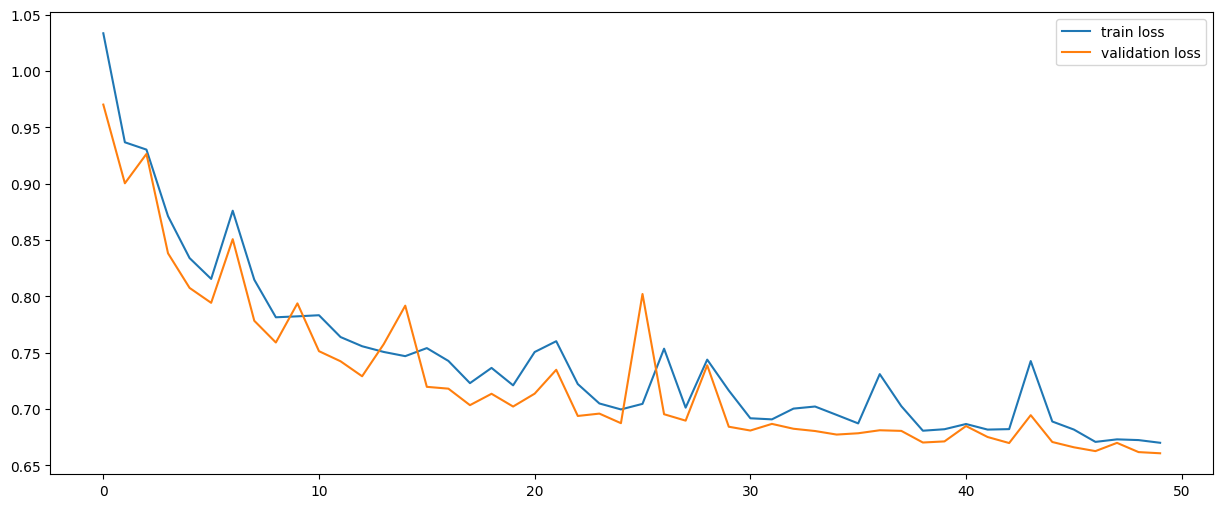

In [22]:
plt.figure(figsize=(15,6))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()

In [23]:
state = torch.load('./best_val_model_pytorch.pt')
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.8904


In [24]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [25]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.8904138439397662
              precision    recall  f1-score   support

           0     0.7879    0.7541    0.7706     13280
           1     0.9240    0.9309    0.9274     21230
           2     0.9160    0.9327    0.9243     22468

    accuracy                         0.8904     56978
   macro avg     0.8760    0.8726    0.8741     56978
weighted avg     0.8891    0.8904    0.8896     56978



In [26]:
class_summary = df.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)


print(class_summary)

   Target_100  Count  Percent
0           0  23170    21.82
1           1  40368    38.02
2           2  42636    40.16


In [27]:
from models.mlp import MLP

mlp_model = MLP()
mlp_model.to(device)

MLP(
  (linear1): Linear(in_features=4000, out_features=128, bias=True)
  (leakyReLU): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=128, out_features=3, bias=True)
)

In [29]:
mlp_train_losses, mlp_val_losses = batch_gd(mlp_model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:02<01:50,  2.25s/it]

model saved
Epoch 1/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.251548, Best Val Epoch: 0


  4%|▍         | 2/50 [00:04<01:49,  2.27s/it]

Epoch 2/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.284183, Best Val Epoch: 0


  6%|▌         | 3/50 [00:06<01:45,  2.25s/it]

Epoch 3/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.222126, Best Val Epoch: 0


  8%|▊         | 4/50 [00:08<01:42,  2.24s/it]

Epoch 4/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.217388, Best Val Epoch: 0


 10%|█         | 5/50 [00:11<01:41,  2.25s/it]

Epoch 5/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.275190, Best Val Epoch: 0


 12%|█▏        | 6/50 [00:13<01:38,  2.24s/it]

Epoch 6/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.220665, Best Val Epoch: 0


 14%|█▍        | 7/50 [00:15<01:36,  2.25s/it]

Epoch 7/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.274554, Best Val Epoch: 0


 16%|█▌        | 8/50 [00:17<01:28,  2.11s/it]

Epoch 8/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:01.820800, Best Val Epoch: 0


 18%|█▊        | 9/50 [00:19<01:27,  2.12s/it]

Epoch 9/50, Train Loss: 1.1004,           Validation Loss: 1.1004, Duration: 0:00:02.146137, Best Val Epoch: 0


 20%|██        | 10/50 [00:21<01:24,  2.12s/it]

Epoch 10/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.122878, Best Val Epoch: 0


 22%|██▏       | 11/50 [00:24<01:25,  2.18s/it]

Epoch 11/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.308411, Best Val Epoch: 0


 24%|██▍       | 12/50 [00:26<01:24,  2.21s/it]

Epoch 12/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.279645, Best Val Epoch: 0


 26%|██▌       | 13/50 [00:28<01:22,  2.23s/it]

Epoch 13/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.280712, Best Val Epoch: 0


 28%|██▊       | 14/50 [00:30<01:19,  2.20s/it]

Epoch 14/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.133349, Best Val Epoch: 0


 30%|███       | 15/50 [00:33<01:16,  2.20s/it]

Epoch 15/50, Train Loss: 1.1008,           Validation Loss: 1.1004, Duration: 0:00:02.191857, Best Val Epoch: 0


 32%|███▏      | 16/50 [00:35<01:15,  2.21s/it]

Epoch 16/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.239899, Best Val Epoch: 0


 34%|███▍      | 17/50 [00:37<01:12,  2.21s/it]

Epoch 17/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.205061, Best Val Epoch: 0


 36%|███▌      | 18/50 [00:39<01:11,  2.23s/it]

Epoch 18/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.276484, Best Val Epoch: 0


 38%|███▊      | 19/50 [00:41<01:09,  2.23s/it]

Epoch 19/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.223784, Best Val Epoch: 0


 40%|████      | 20/50 [00:44<01:06,  2.23s/it]

Epoch 20/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.237389, Best Val Epoch: 0


 42%|████▏     | 21/50 [00:46<01:04,  2.24s/it]

Epoch 21/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.245061, Best Val Epoch: 0


 44%|████▍     | 22/50 [00:48<01:03,  2.26s/it]

Epoch 22/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.317980, Best Val Epoch: 0


 46%|████▌     | 23/50 [00:51<01:00,  2.26s/it]

Epoch 23/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.242294, Best Val Epoch: 0


 48%|████▊     | 24/50 [00:53<00:58,  2.25s/it]

Epoch 24/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.223090, Best Val Epoch: 0


 50%|█████     | 25/50 [00:55<00:56,  2.25s/it]

Epoch 25/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.266555, Best Val Epoch: 0


 52%|█████▏    | 26/50 [00:57<00:53,  2.24s/it]

Epoch 26/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.220000, Best Val Epoch: 0


 54%|█████▍    | 27/50 [01:00<00:52,  2.27s/it]

Epoch 27/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.328571, Best Val Epoch: 0


 56%|█████▌    | 28/50 [01:02<00:49,  2.27s/it]

Epoch 28/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.279919, Best Val Epoch: 0


 58%|█████▊    | 29/50 [01:04<00:47,  2.26s/it]

Epoch 29/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.219765, Best Val Epoch: 0


 60%|██████    | 30/50 [01:06<00:45,  2.27s/it]

Epoch 30/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.301105, Best Val Epoch: 0


 62%|██████▏   | 31/50 [01:09<00:43,  2.27s/it]

Epoch 31/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.257396, Best Val Epoch: 0


 64%|██████▍   | 32/50 [01:11<00:40,  2.27s/it]

Epoch 32/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.263563, Best Val Epoch: 0


 66%|██████▌   | 33/50 [01:13<00:38,  2.26s/it]

Epoch 33/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.242274, Best Val Epoch: 0


 68%|██████▊   | 34/50 [01:15<00:35,  2.22s/it]

Epoch 34/50, Train Loss: 1.1004,           Validation Loss: 1.1004, Duration: 0:00:02.132089, Best Val Epoch: 0


 70%|███████   | 35/50 [01:18<00:33,  2.24s/it]

Epoch 35/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.270541, Best Val Epoch: 0


 72%|███████▏  | 36/50 [01:20<00:30,  2.21s/it]

Epoch 36/50, Train Loss: 1.1008,           Validation Loss: 1.1004, Duration: 0:00:02.152978, Best Val Epoch: 0


 74%|███████▍  | 37/50 [01:22<00:28,  2.23s/it]

Epoch 37/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.271504, Best Val Epoch: 0


 76%|███████▌  | 38/50 [01:24<00:26,  2.21s/it]

Epoch 38/50, Train Loss: 1.1008,           Validation Loss: 1.1004, Duration: 0:00:02.166874, Best Val Epoch: 0


 78%|███████▊  | 39/50 [01:26<00:24,  2.22s/it]

Epoch 39/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.251300, Best Val Epoch: 0


 80%|████████  | 40/50 [01:29<00:22,  2.23s/it]

Epoch 40/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.245889, Best Val Epoch: 0


 82%|████████▏ | 41/50 [01:31<00:19,  2.21s/it]

Epoch 41/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.163742, Best Val Epoch: 0


 84%|████████▍ | 42/50 [01:33<00:17,  2.22s/it]

Epoch 42/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.255327, Best Val Epoch: 0


 86%|████████▌ | 43/50 [01:35<00:15,  2.20s/it]

Epoch 43/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.148679, Best Val Epoch: 0


 88%|████████▊ | 44/50 [01:37<00:13,  2.22s/it]

Epoch 44/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.261636, Best Val Epoch: 0


 90%|█████████ | 45/50 [01:40<00:11,  2.22s/it]

Epoch 45/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.235084, Best Val Epoch: 0


 92%|█████████▏| 46/50 [01:42<00:09,  2.25s/it]

Epoch 46/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.320176, Best Val Epoch: 0


 94%|█████████▍| 47/50 [01:44<00:06,  2.25s/it]

Epoch 47/50, Train Loss: 1.1005,           Validation Loss: 1.1004, Duration: 0:00:02.251183, Best Val Epoch: 0


 96%|█████████▌| 48/50 [01:47<00:04,  2.25s/it]

Epoch 48/50, Train Loss: 1.1007,           Validation Loss: 1.1004, Duration: 0:00:02.243164, Best Val Epoch: 0


 98%|█████████▊| 49/50 [01:49<00:02,  2.27s/it]

Epoch 49/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.330949, Best Val Epoch: 0


100%|██████████| 50/50 [01:51<00:00,  2.23s/it]

Epoch 50/50, Train Loss: 1.1006,           Validation Loss: 1.1004, Duration: 0:00:02.286479, Best Val Epoch: 0


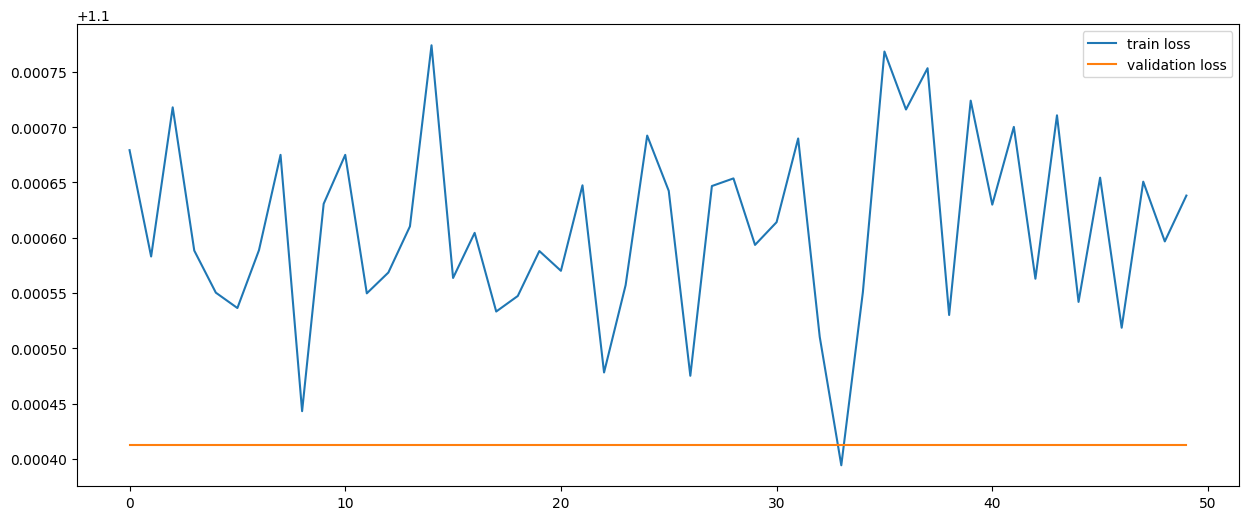

In [30]:
plt.figure(figsize=(15,6))
plt.plot(mlp_train_losses, label='train loss')
plt.plot(mlp_val_losses, label='validation loss')
plt.legend()

In [31]:
state = torch.load('./best_val_model_pytorch.pt')
model = MLP()
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.3319


In [32]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [33]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.33188248095756256
              precision    recall  f1-score   support

           0     0.2317    0.4620    0.3086     13280
           1     0.4313    0.0720    0.1234     21230
           2     0.4172    0.5005    0.4551     22468

    accuracy                         0.3319     56978
   macro avg     0.3601    0.3448    0.2957     56978
weighted avg     0.3792    0.3319    0.2974     56978

